###  Exploratory Data Analysis (EDA)

#####  Pre-processing of data before basic data analysis :

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read training dataset and drop the 'ID' column which contains Sr.No. only
training_data = pd.read_csv('./Dataset/cs-training.csv').drop('ID',axis = 1)

# For each column heading replace "-" and convert heading into lowercase
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-','').lower())
training_data.columns = cleancolumn

In [3]:
#Pre-view of pre-processed dataset
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#####  Basic Data Analysis :

In [4]:
# Describe all the statistical properties of training dataset
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
# Get the median of each column in dataset
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [6]:
# Get the mean of each column in dataset
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [7]:
# This will give calculation of target labels, their categories & respective percentages.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels


0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

Text(0, 0.5, 'Number of records')

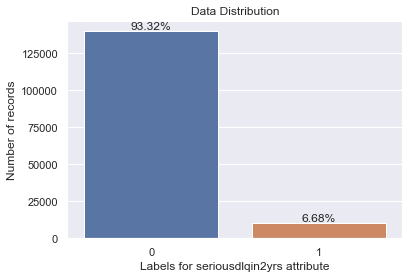

In [8]:
# Graphical representation of the target label with percentage.

sns.set() # set aesthetic parameters in one step 
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
sns.set(font_scale=1.5)
ax = plt.gca()  # to get the axes directly

# code used to get the percentage of frequency of category in dataset 
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 2, '{:.2f}%'.format(100*(height/total_len)),
           fontsize=12, ha='center', va = 'bottom')
# '{:.2f}%'.format(100*(height/total_len)) --> this means whatever value returned by 100*(height/total_len) equation .. it will
# format it upto two decimal places

ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Number of records")


### Missing values :

In [9]:
#it'll give which column has missing value &  gives the count of how many values are missing
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

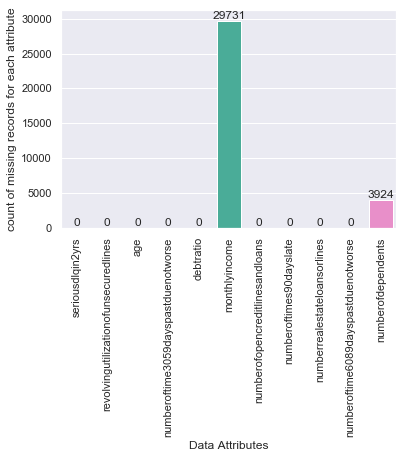

In [10]:
# Graphical representation of the missing values.
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()

# code to get the no. of missing values at top of countplot bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=12, ha='center', va='bottom')

# set aesthetic parameters
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [11]:
# Actual replacement of the missing values with its mean value
training_data_mean_replace = training_data.fillna(training_data.mean())
training_data_mean_replace.head()


,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
training_data_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [13]:
# Actual replacement of the missing values with its mean value
training_data_median_replace = training_data.fillna(training_data.median())
training_data_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [14]:
training_data_median_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

###  Correlation :

In [15]:
training_data.fillna(training_data.median(),inplace=True) # inplace = True makes sure that missing or null values has replaced.

# Get correlation of training datset
training_data[training_data.columns[1:]].corr()
# except fst i.e. with index zero cause its our target column.

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


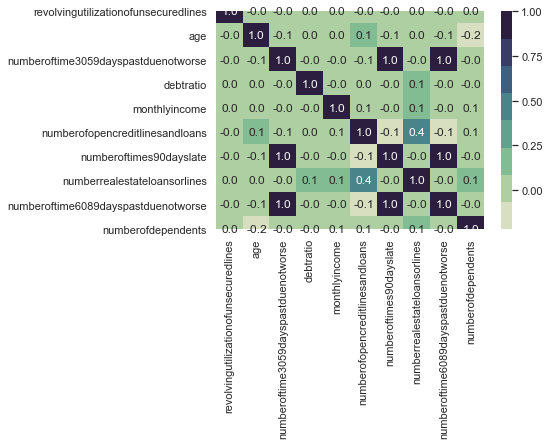

In [16]:
# Visualization of correlation with seaborn heatmap.
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
           cmap=(sns.cubehelix_palette(8,start=.5,rot=-.75)))
plt.show()

### Outlier Detection :

1) Percentile based outlier detection : 95% percentile used or IQR based
    

In [17]:
# percentile based outlier detection
def percentile_based_outlier(data, threshold=95): # here 2 attributes are taken  defined function i.e. data & threshold
    diff = (100 - threshold)/2.0     
    (minval,maxval) = np.percentile(data,[diff, 100 - diff])
    # np.percentile  used to compute the nth precentile of the given data (array elements)
    return ((data < minval) | (data > maxval))
    # | is a (bitwise or) -> either or operation ... gives output zero when both are zeros otherwise 1 of them are zero

#percentile_based_outlier(training_data.age)

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
#def outliers_iqr(ys):
 #   quartile_1,quartile_2 = np.percentile(ys,[25,75])
  #  iqr = quartile_3 - quartile_1
   # Lower_bound = quartile_1 - (iqr * 1.5)
    #upper_bound = quartile_3 + (iqr * 1.5)
    #return np.where((ys > upper_bound)| (ys < Lower_bound))

2) Median_absolute_deviation method

In [18]:
def mad_based_outlier(points, thresh=3.5):   # here 2 attributes are taken  defined function i.e. data & threshold
    
    median_y = np.median(points) # get median of points which willl come in brackets     # np.median
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])      # np.abs   # for y in points {best}
    modified_z_score = [0.6745*(y - median_y) / median_absolute_deviation_y 
                        for y in points]
    return np.abs(modified_z_score) > thresh

#mad_based_outlier(points=training_data.age)

3) Standard deviation about mean

In [19]:
def std_div(data,threshold=3):          # here 2 attributes are taken  defined function i.e. data & threshold
    std = data.std()   # .std() calculates or gives the standard deviation of data
    mean = data.mean() # .mean() calculates the mean of data
    isOutlier = []
    
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else: 
            isOutlier.append(False)
    return isOutlier

    
#std_div(data=training_data.age)

 Outlier voter mechanism

In [20]:
# here we have constructed one function for voter mechanism . where; if any two citerias of above methods shows that 
# a data point is outlier then that data point is considered as outlier in final(processed dataset) dataset

def outlierVote(data):
    a = percentile_based_outlier(data)
    b = mad_based_outlier(data)
    c =std_div(data)
    temp = list(zip(data.index, a, b, c))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

#outlierVote(data=training_data.age)

    

##### Visualization of outliers :

In [21]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers')
    axes[1].set_title('MAD-based Outliers')
    axes[2].set_title('STD-based Outliers')
    axes[3].set_title('Majority vote based Outliers')
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

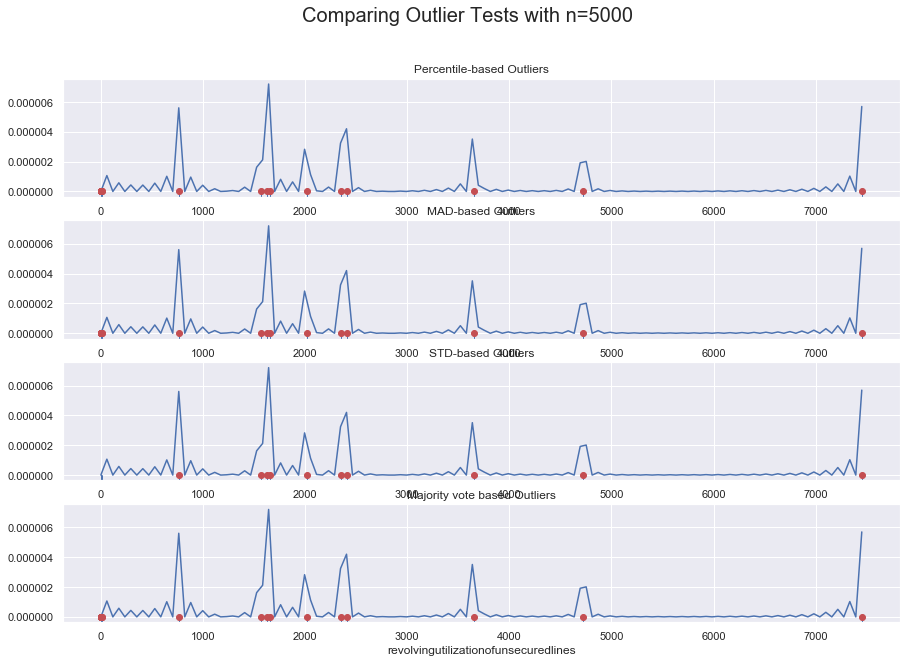

In [22]:
plotOutlier(training_data.revolvingutilizationofunsecuredlines.sample(5000))

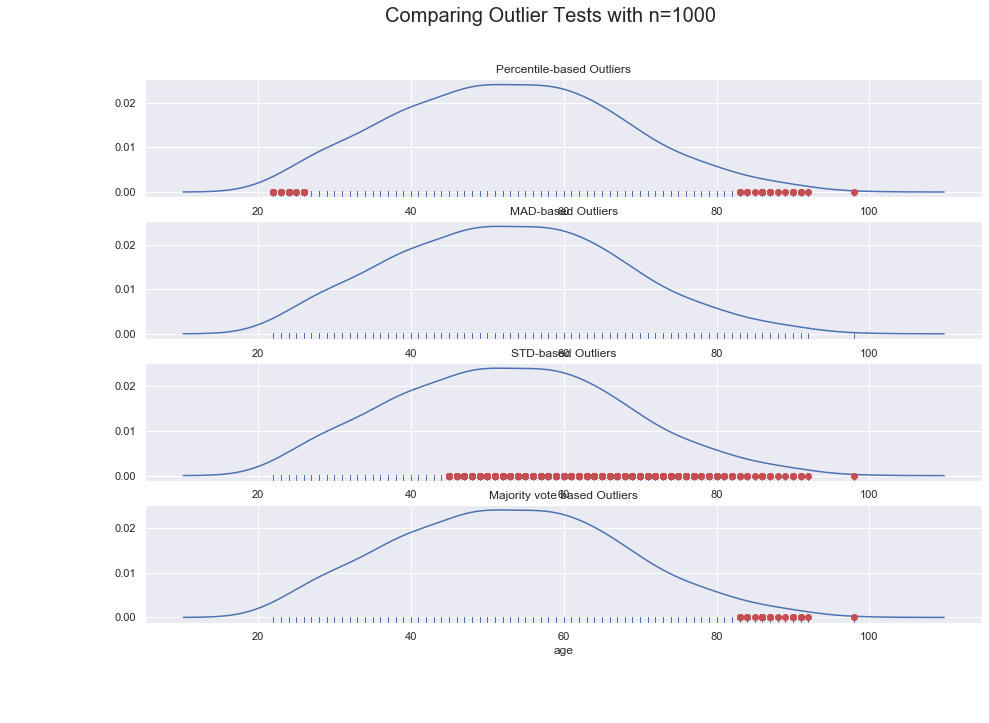

In [23]:
plotOutlier(training_data.age.sample(1000))

    Code written to plot the outliers detection graph for each column in dataset except target column
   
       for i in range(len(training_data.columns[1:])):
        # plotOutlier(training_data.drop('revolvingutilizationofunsecuredlines')columns[i].sample(1000))
        plotOutlier(training_data[training_data.columns[i]].sample(1000))

### Handling the outliers


1) Outliers handling for 'revolvingutilizationofunsecuredlines' column 

In [24]:

revNew = []
training_data.revolvingutilizationofunsecuredlines
for val in training_data.revolvingutilizationofunsecuredlines:
    if val <= 0.9999:
        revNew.append(val)
    else:
        revNew.append(0.9999)
training_data.revolvingutilizationofunsecuredlines = revNew

2) Outliers handling for 'age' column

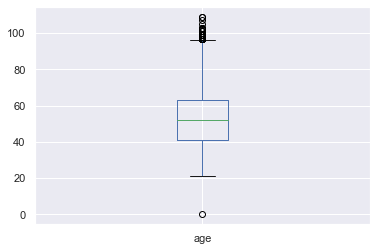

In [25]:
training_data.age.plot.box()
# outlier are those who do not follow pattern of datapoints , Hence here we can conclude that the datapoint which is 
# somewhat near to zero or exactly zero (basically, we cant be so sure from seeing this boxplot only) is an outlier

In [26]:
import collections
collections.Counter(training_data.age)
# By computing this we confirm whther it is a zero or datapoints near to zero is outlier.

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

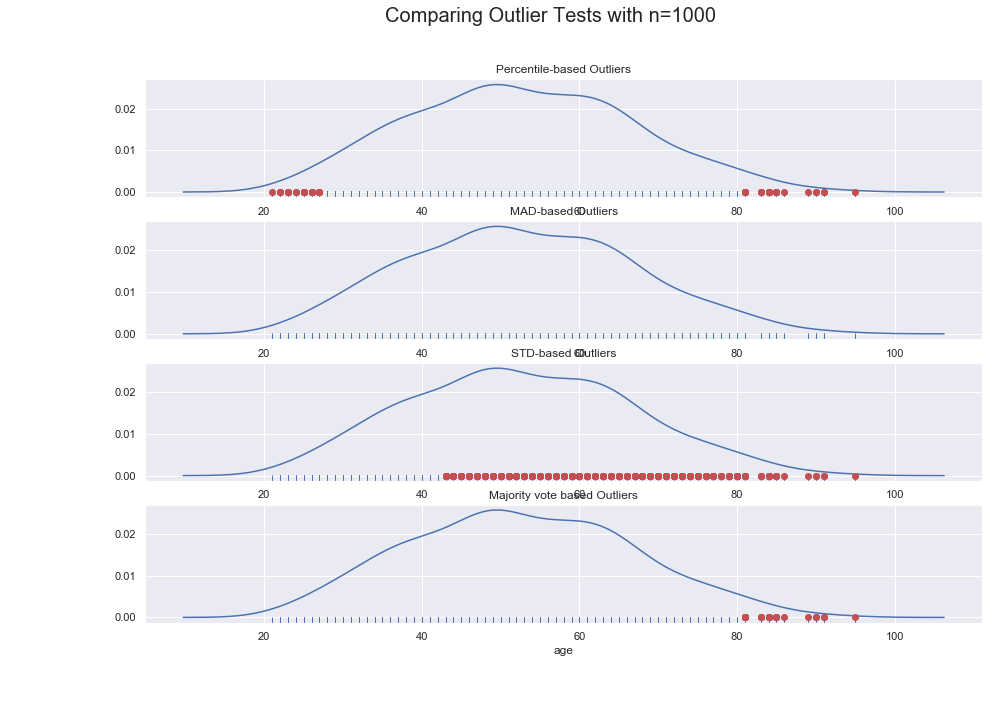

In [27]:
plotOutlier(training_data.age.sample(1000))
# by observing this we can say that datapoints which are lesser than 21 age are outliers

In [28]:
ageNew = []
for val in training_data.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)

training_data.age = ageNew

3) Outlier hsndling for 'numberoftime3059dayspastduenotworse' column

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


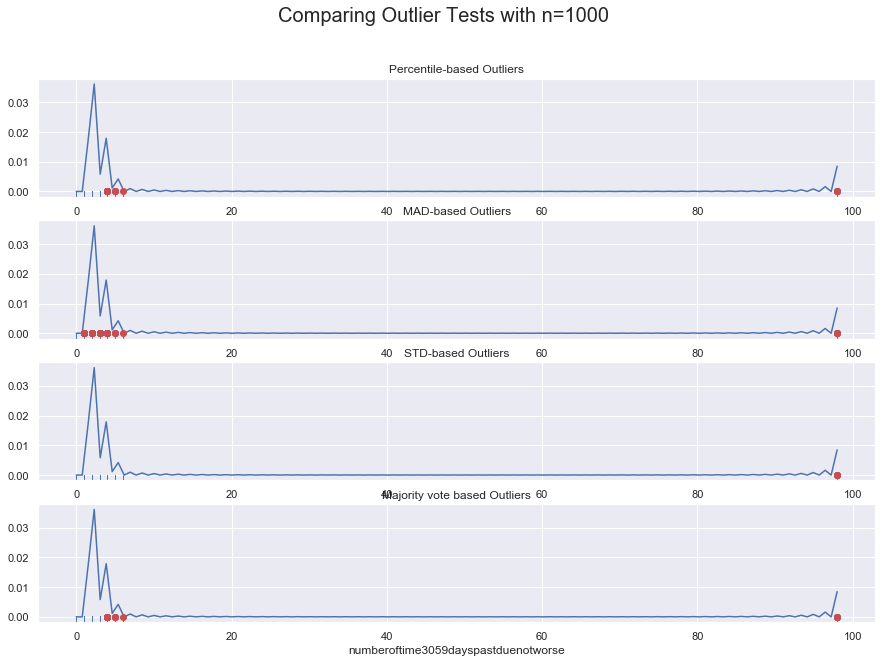

In [29]:
plotOutlier(training_data.numberoftime3059dayspastduenotworse.sample(1000))
# by observing this we can say that datapoints somewhere near to 100 are outliers 

In [30]:
collections.Counter(training_data.numberoftime3059dayspastduenotworse)
# points mentioned above which are somewhere near to 100 are exactly 96 & 98.

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [31]:
New = []
med = training_data.numberoftime3059dayspastduenotworse.median()
for val in training_data.numberoftime3059dayspastduenotworse:
    if ((val == 96) | (val == 98)):
        New.append(med)
    else:
        New.append(val)
training_data.numberoftime3059dayspastduenotworse = New

4) Outlier detection for 'debtratio' column in dataset

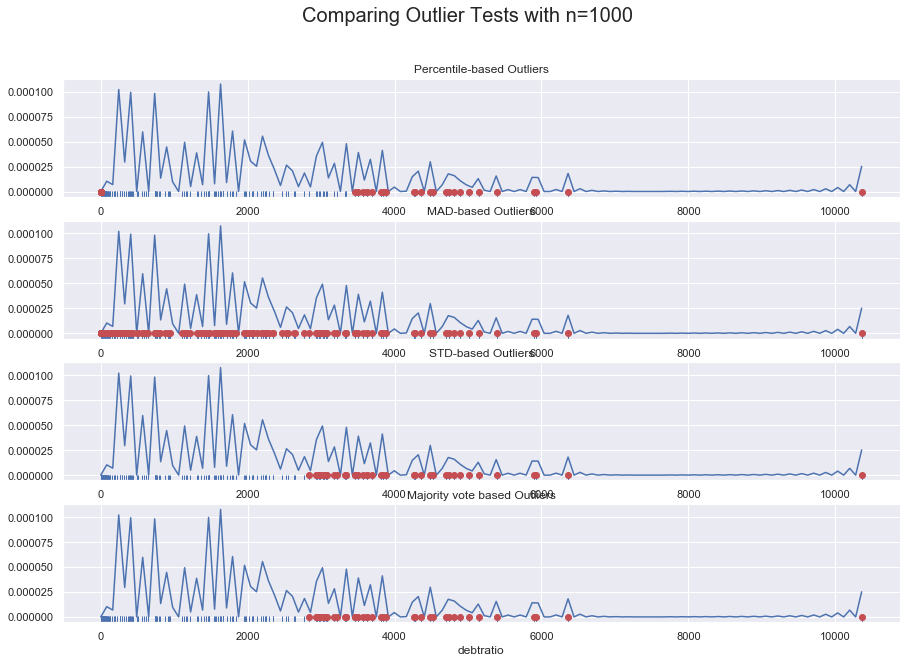

In [32]:
plotOutlier(training_data.debtratio.sample(1000))
# No any clear observations can be conclude from this plot

In [33]:
def outlierRatio(data):
    functions= [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]
        
    return outlierDict
outlierRatio(training_data.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

In [34]:
minUpperBound = min([val for (val,out) in zip(training_data.debtratio,mad_based_outlier(training_data.debtratio)) if out == True])

In [35]:
newDebtratio = []
for value in training_data.debtratio:
    if val > minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtratio.append(val)

training_data.debtratio = newDebtratio

def plotOutlierFree(x):
    fig, axes = plt.subplots(nrows=4)
    nOutliers = []
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        tfOutlier = zip(x, func(x))
        nOutliers.append(len([index for (index, bol) in tfOutlier if bol == True]))
        outlierFree = [index for (index, bol) in tfOutlier if bol == True]
        sns.distplot(outlierFree, ax=ax, rug=True, hist=False)
        
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=15)
    axes[0].set_title('Percentile-based Outliers, removed: {r}'.format(r=nOutliers[0]), **kwargs)
    axes[1].set_title('MAD-based Outliers, removed: {r}'.format(r=nOutliers[1]), **kwargs)
    axes[2].set_title('STD-based Outliers, removed: {r}'.format(r=nOutliers[2]), **kwargs)
    axes[3].set_title('Majority vote based Outliers, removed: {r}'.format(r=nOutliers[3]), **kwargs)
    fig.suptitle('Outlier Removed By Method with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

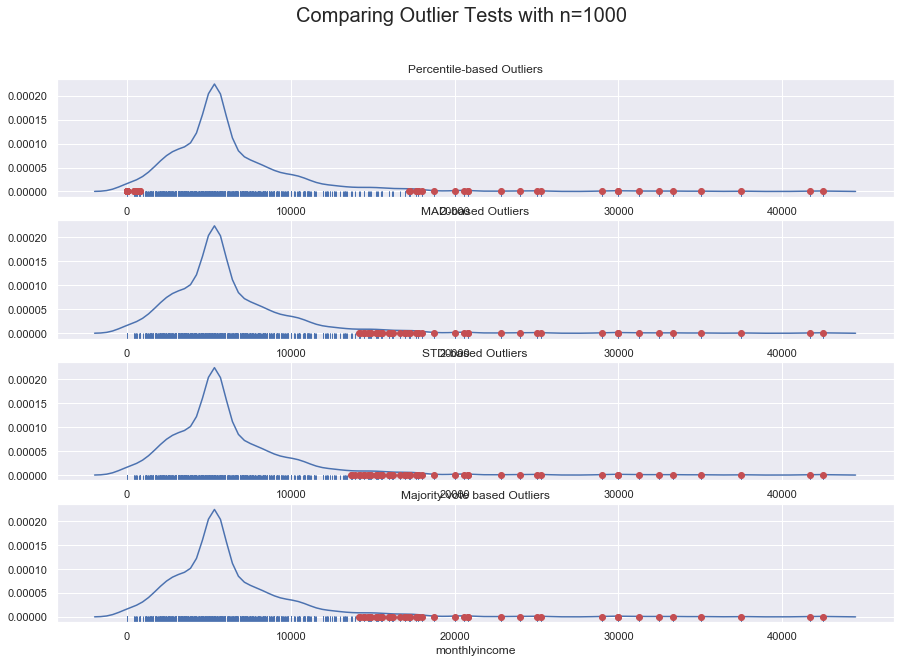

In [36]:
plotOutlier(training_data.monthlyincome.sample(1000))

In [37]:
def replaceOutlier(data, method = outlierVote, replace='median'):
    '''replace: median (auto)
                'minUpper' which is the upper bound of the outlier detection'''
    vote = outlierVote(data)
    x = pd.DataFrame(zip(data, vote), columns=['debt', 'outlier'])
    if replace == 'median':
        replace = x.debt.median()
    elif replace == 'minUpper':
        replace = min([val for (val, vote) in zip(data, vote) if vote == True])
        if replace < data.mean():
            return 'There are outliers lower than the sample mean'
    debtNew = []
    for i in range(x.shape[0]):
        if x.iloc[i][1] == True:
            debtNew.append(replace)
        else:
            debtNew.append(x.iloc[i][0])
    
    return debtNew
 

In [38]:
incomeNew = replaceOutlier(training_data.monthlyincome, replace='minUpper')

In [39]:
training_data.monthlyincome = incomeNew

5) Outlier handling for the 'numberrealestateloansorlines'

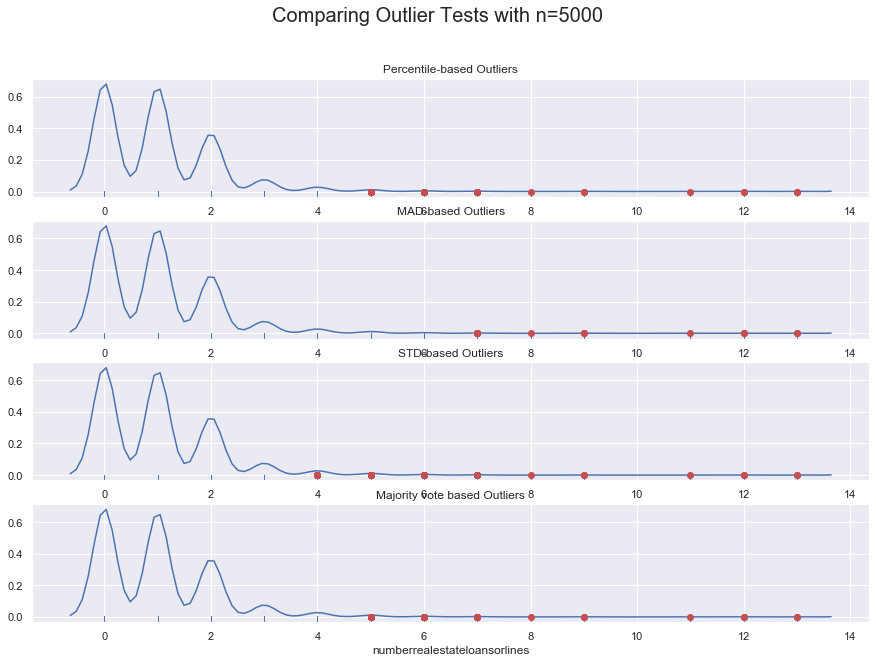

In [40]:
plotOutlier(training_data.numberrealestateloansorlines.sample(5000))

In [41]:
collections.Counter(training_data.numberrealestateloansorlines)
# We can conclude values which are greater than 17 are outliers

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

In [42]:
realNew = []
for val in training_data.numberrealestateloansorlines:
    if val>17:
        realNew.append(17)
    else:
        realNew.append(val)
training_data.numberrealestateloansorlines = realNew
        
            

6) Outlier handling for 'numberoftimes90dayslate' column in dataset

In [43]:
# Frequency analysis code
collections.Counter(training_data.numberoftimes90dayslate)

# we can conclude that 96 & 98 are outliers

Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

In [44]:
def removeSpecificAndPutMedian(data, first = 98, second = 96):
    New = []
    med = data.median()
    for val in data:
        if ((val == first) | (val == second)):
            New.append(med)
        else:
            New.append(val)
    return New

In [45]:
new = removeSpecificAndPutMedian(training_data.numberoftimes90dayslate)
training_data.numberoftimes90dayslate = new

7) Outlier handling for 'numberoftime6089dayspastduenotworse' column in dataset

In [46]:
collections.Counter(training_data.numberoftime6089dayspastduenotworse)

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

In [47]:
new = removeSpecificAndPutMedian(training_data.numberoftime6089dayspastduenotworse)
training_data.numberoftime6089dayspastduenotworse = new

8) Outlier handling for 'numberofdependents' column in dataset

In [48]:
collections.Counter(training_data.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 90826,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [49]:
depNew = []
for var in training_data.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)
training_data.numberofdependents = depNew

In [50]:
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2.0,0,9120.0,13,0.0,6,0.0,2.0
1,0,0.957151,40,0.0,0,2600.0,4,0.0,0,0.0,1.0
2,0,0.658180,38,1.0,0,3042.0,2,1.0,0,0.0,0.0
3,0,0.233810,30,0.0,0,3300.0,5,0.0,0,0.0,0.0
4,0,0.907239,49,1.0,0,16867.0,7,0.0,1,0.0,0.0


### Final Pre-processed dataset for further operations

In [51]:
preprocessed_training_data = training_data

In [52]:
preprocessed_training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2.0,0,9120.0,13,0.0,6,0.0,2.0
1,0,0.957151,40,0.0,0,2600.0,4,0.0,0,0.0,1.0
2,0,0.658180,38,1.0,0,3042.0,2,1.0,0,0.0,0.0
3,0,0.233810,30,0.0,0,3300.0,5,0.0,0,0.0,0.0
4,0,0.907239,49,1.0,0,16867.0,7,0.0,1,0.0,0.0


In [53]:
preprocessed_training_data.to_csv('Preprocessed_training_data.csv')